# Day 08. Exercise 04
# Regression

## 0. Imports

In [787]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [788]:
df = pd.read_csv('../data/checker_regression.csv')

In [789]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [790]:
X = df.drop(['uid', 'AVG(diff)'], axis=1)
y = df['AVG(diff)']

In [791]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [792]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    train_rmse_list = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        test_pred = model.predict(X_test)
        train_pred = model.predict(X_train)

        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

        train_rmse_list.append(train_rmse)
        print(f'train - {train_rmse}  |  test - {test_rmse}')

    avg_train_rmse = np.mean(train_rmse_list)
    print(f'Average RMSE on crossval is {avg_train_rmse}')

In [793]:
crossval(10, X, y, LinearRegression(fit_intercept=False))

train - 46.329258839278644  |  test - 76.15396487014772
train - 52.10238602031073  |  test - 29.661230930448266
train - 52.806362874495264  |  test - 15.396819224961066
train - 49.871112532796715  |  test - 53.52233463985673
train - 50.20851050485217  |  test - 50.53880622653353
train - 52.560037041170254  |  test - 22.914732558515144
train - 52.22520442877114  |  test - 27.39437158695712
train - 52.42359732320371  |  test - 16.513674647651232
train - 47.00431676907416  |  test - 75.60363765766431
train - 45.667444955992174  |  test - 83.15573637322387
Average RMSE on crossval is 50.1198231289945


In [794]:
crossval(10, X, y, DecisionTreeRegressor(max_depth=4, random_state=21))

train - 17.374513339029555  |  test - 72.60726075425316
train - 18.725869837047693  |  test - 5.966213466261495
train - 18.820086671802997  |  test - 0.0
train - 17.529595041627218  |  test - 34.78965363437814
train - 17.11208914796938  |  test - 65.3143013441118
train - 16.17558466163653  |  test - 34.55984393049251
train - 18.593330211164027  |  test - 10.47272416274242
train - 15.86471791337304  |  test - 33.71758069636481
train - 6.907988675416496  |  test - 80.18086029186054
train - 16.238513726395283  |  test - 55.53206298924316
Average RMSE on crossval is 16.334228922546224


In [795]:
crossval(10, X, y, RandomForestRegressor(n_estimators=100, max_depth=25, random_state=21))

train - 12.777661106062592  |  test - 55.21884918830304
train - 14.944676960459738  |  test - 14.136950174002187
train - 15.145373082774338  |  test - 0.0
train - 14.781775951331486  |  test - 26.925919120802543
train - 12.998387321887547  |  test - 52.704000228872594
train - 15.162144682092565  |  test - 32.380540830875574
train - 16.39491297753858  |  test - 14.53373200141274
train - 14.98799883276986  |  test - 22.20654668271111
train - 14.09532647051205  |  test - 69.45674467575043
train - 15.002690750328759  |  test - 42.562647313312866
Average RMSE on crossval is 14.629094813575751


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [796]:
linear_model = LinearRegression(fit_intercept=False)
tree_model =  DecisionTreeRegressor(max_depth=5, random_state=21)
forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=21)

In [797]:
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=21)

In [798]:
linear_pred = linear_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

In [799]:
print(f'liner prediction = {np.sqrt(mean_squared_error(y_test, linear_pred))}')
print(f'tree prediction = {np.sqrt(mean_squared_error(y_test, tree_pred))}')
print(f'forest prediction = {np.sqrt(mean_squared_error(y_test, forest_pred))}')

liner prediction = 57.41234356274978
tree prediction = 49.56814700910925
forest prediction = 40.428368385058995


In [800]:
def plot_graf(y_test ,model, name):
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, model,
            color='blue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle='--')
    plt.title(name)
    plt.xlabel('Actual average difference')
    plt.ylabel('Prediction made')

    plt.show()

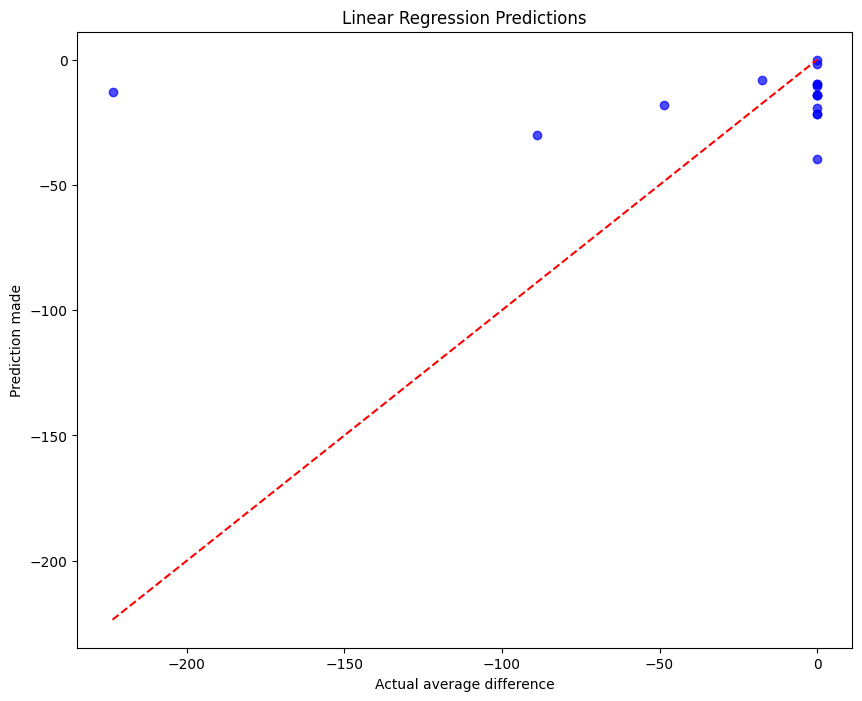

In [801]:
plot_graf(y_test, linear_pred, 'Linear Regression Predictions')

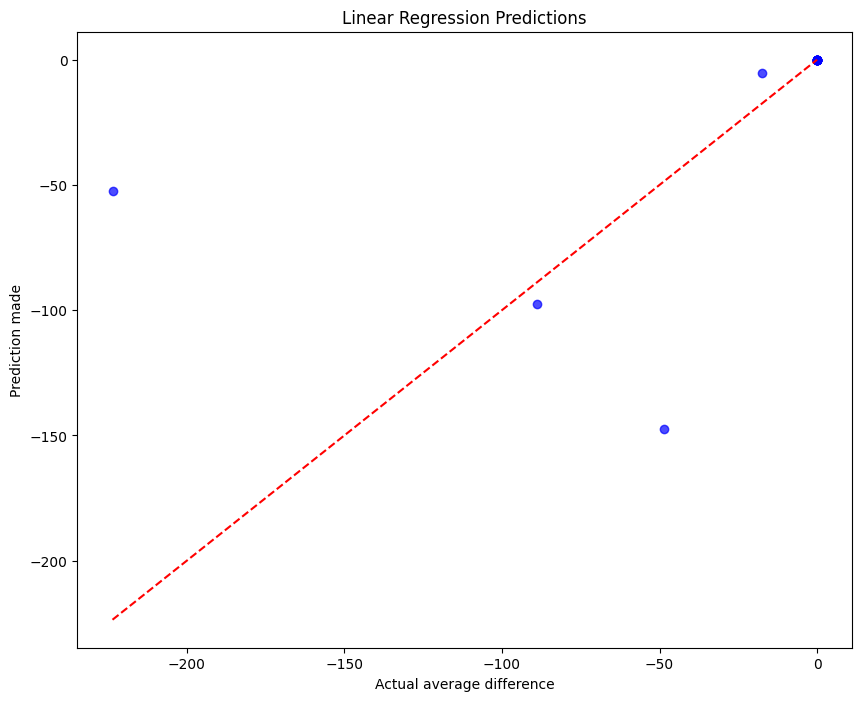

In [802]:
plot_graf(y_test, tree_pred, 'Linear Regression Predictions')

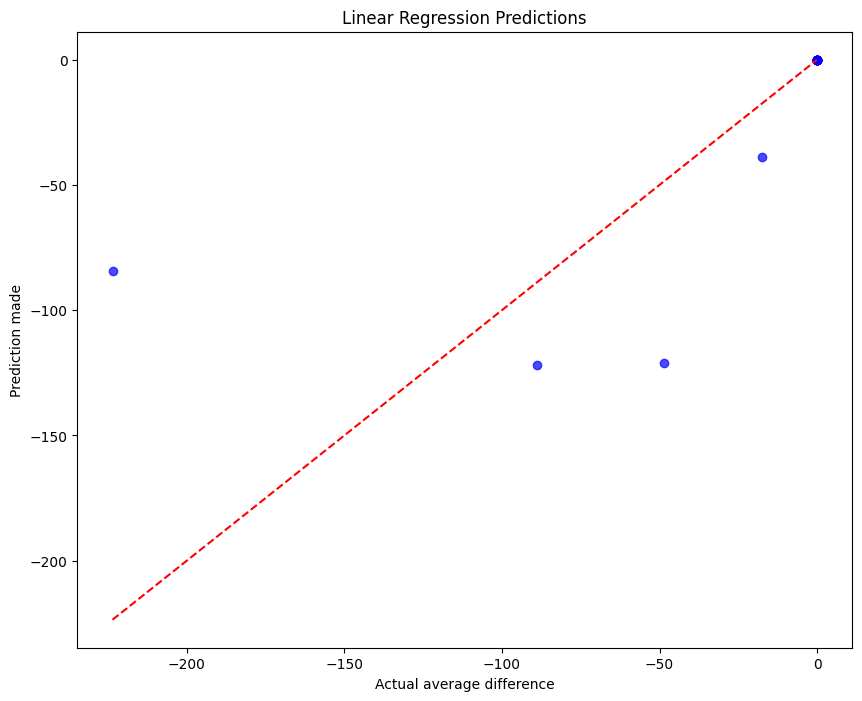

In [803]:
plot_graf(y_test, forest_pred, 'Linear Regression Predictions')

### В идеальном случае все точки будут распологаться на красной линии.